In [10]:
# import zipfile

# # Download zip file of pizza_steak images
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [11]:
!ls pizza_steak

test  train


In [12]:
!ls pizza_steak/train

pizza  steak


In [13]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [14]:
import os

# walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f'There are {len(dirnames)} directories and {len(filenames)} in {dirpath}')

There are 2 directories and 0 in pizza_steak
There are 2 directories and 0 in pizza_steak/train
There are 0 directories and 750 in pizza_steak/train/pizza
There are 0 directories and 750 in pizza_steak/train/steak
There are 2 directories and 0 in pizza_steak/test
There are 0 directories and 250 in pizza_steak/test/pizza
There are 0 directories and 250 in pizza_steak/test/steak


In [15]:
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))
num_steak_images_train

750

In [16]:
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [17]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis('off');

    print(f'Image shape: {img.shape}')

    return img

Image shape: (511, 512, 3)


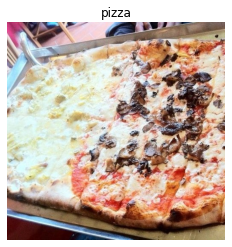

In [18]:
img = view_random_image('pizza_steak/train/', 'pizza')

In [19]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(511, 512, 3), dtype=uint8, numpy=
array([[[193,  61, 121],
        [183,  53, 113],
        [188,  59, 116],
        ...,
        [114,  95,  89],
        [110,  91,  85],
        [114,  95,  89]],

       [[186,  54, 114],
        [186,  54, 114],
        [192,  63, 120],
        ...,
        [116,  97,  91],
        [117,  98,  92],
        [123, 104,  98]],

       [[195,  61, 122],
        [190,  58, 118],
        [192,  60, 118],
        ...,
        [115,  96,  90],
        [118,  99,  93],
        [123, 104,  98]],

       ...,

       [[ 76,  16,  15],
        [ 73,  13,  12],
        [ 71,  13,  11],
        ...,
        [187, 174, 132],
        [184, 170, 131],
        [182, 168, 129]],

       [[ 76,  16,  15],
        [ 74,  14,  13],
        [ 73,  15,  13],
        ...,
        [180, 167, 125],
        [182, 168, 129],
        [181, 167, 128]],

       [[ 74,  16,  14],
        [ 74,  16,  14],
        [ 75,  17,  15],
        ...,
        [173, 161, 12

In [20]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# preprocess data( get all of the pixel values between 0 and 1)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup paths directory
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir,
    batch_size=32,
    target_size=(224,224),
    class_mode='binary',
    seed=42
)
valid_data = valid_datagen.flow_from_directory(
    directory=test_dir,
    batch_size=32,
    target_size=(224, 224),
    class_mode='binary',
    seed=42
)

# Build a CNN model ( same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential(name='CNN')
model_1.add(tf.keras.layers.Conv2D(
    filters=10,
    kernel_size=3,
    activation='relu',
    input_shape=(224,224,3),
    # name='inputLayer'
))
model_1.add(tf.keras.layers.Conv2D(
    10,
    3,
    activation='relu',
    # name='hidden1'
))
model_1.add(tf.keras.layers.MaxPool2D(
    pool_size=2,
    padding='valid'
))
model_1.add(tf.keras.layers.Conv2D(
    filters=10,
    kernel_size=3,
    activation='relu',
    input_shape=(224,224,3),
    # name='inputLayer'
))
model_1.add(tf.keras.layers.Conv2D(
    10,
    3,
    activation='relu',
    # name='hidden1'
))
model_1.add(tf.keras.layers.MaxPool2D(
    pool_size=2,
    padding='valid'
))
model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile CNN
model_1.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# fit the model
history_1 = model_1.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 24s 493ms/step - loss: 0.5776 - accuracy: 0.6947 - val_loss: 0.4217 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 23s 487ms/step - loss: 0.4185 - accuracy: 0.8127 - val_loss: 0.3312 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 23s 493ms/step - loss: 0.3904 - accuracy: 0.8267 - val_loss: 0.3392 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 23s 488ms/step - loss: 0.3755 - accuracy: 0.8413 - val_loss: 0.4169 - val_accuracy: 0.7960
Epoch 5/5
47/47 [==============================] - 24s 509ms/step - loss: 0.3409 - accuracy: 0.8633 - val_loss: 0.2979 - val_accuracy: 0.8840


In [21]:
model_1.summary()

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                           

In [22]:
# set random seed
tf.random.set_seed(42)

# build model
model_2 = tf.keras.Sequential(name='simpleNN')
model_2.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
model_2.add(tf.keras.layers.Dense(4, activation='relu'))
model_2.add(tf.keras.layers.Dense(4, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model_2.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Fit the model
model_2.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 4s 72ms/step - loss: 1.1582 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 3s 63ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 3s 64ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 3s 64ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 3s 60ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [23]:
model_2.summary()

Model: "simpleNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [24]:
# set random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential(name='betternonCNN')
model_3.add(tf.keras.layers.Flatten(input_shape=(224,224, 3)))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile the model
model_3.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

# Fit the model
model_3.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 4s 82ms/step - loss: 3.0717 - accuracy: 0.6247 - val_loss: 0.6652 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 4s 78ms/step - loss: 1.1987 - accuracy: 0.6627 - val_loss: 1.0652 - val_accuracy: 0.6440
Epoch 3/5
47/47 [==============================] - 4s 79ms/step - loss: 0.7863 - accuracy: 0.7220 - val_loss: 0.4595 - val_accuracy: 0.7760
Epoch 4/5
47/47 [==============================] - 4s 77ms/step - loss: 0.6006 - accuracy: 0.7493 - val_loss: 0.5125 - val_accuracy: 0.7680
Epoch 5/5
47/47 [==============================] - 4s 75ms/step - loss: 0.4485 - accuracy: 0.7973 - val_loss: 0.5695 - val_accuracy: 0.7520


In [25]:
model_3.summary()

Model: "betternonCNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


Image shape: (512, 512, 3)
Image shape: (384, 512, 3)


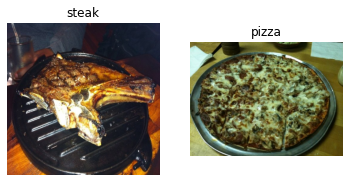

In [26]:
# visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
pizza_img = view_random_image('pizza_steak/train/', 'pizza')

In [27]:
# Define directory dataset paths
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

In [28]:
# Create train and test data generators and rescale the data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [29]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode='binary',
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [31]:
# Get the first two images
images[:2], images[0].shape


(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [32]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [33]:
model_4 = Sequential([
    Conv2D(
        filters=10,
        kernel_size=3,
        strides=1,
        padding='valid',
        activation='relu',
        input_shape=(224,224,3)
    ),
    Conv2D(
        10,
        3,
        activation='relu'
    ),
    Conv2D(
        10,
        3,
        activation='relu'
    ),
    Flatten(),
    Dense(
        1,
        activation='sigmoid'
    )
])

In [34]:
model_4.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [35]:
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [36]:
history_4 = model_4.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 28s 599ms/step - loss: 1.5974 - accuracy: 0.6153 - val_loss: 0.5569 - val_accuracy: 0.7540
Epoch 2/5
47/47 [==============================] - 28s 589ms/step - loss: 0.5000 - accuracy: 0.7607 - val_loss: 0.4214 - val_accuracy: 0.7980
Epoch 3/5
47/47 [==============================] - 28s 602ms/step - loss: 0.3844 - accuracy: 0.8487 - val_loss: 0.3588 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 29s 611ms/step - loss: 0.2244 - accuracy: 0.9207 - val_loss: 0.3828 - val_accuracy: 0.8260
Epoch 5/5
47/47 [==============================] - 28s 599ms/step - loss: 0.1036 - accuracy: 0.9707 - val_loss: 0.6292 - val_accuracy: 0.7940


**5. Evaluating our model**


Let's look at some evaluating metrics

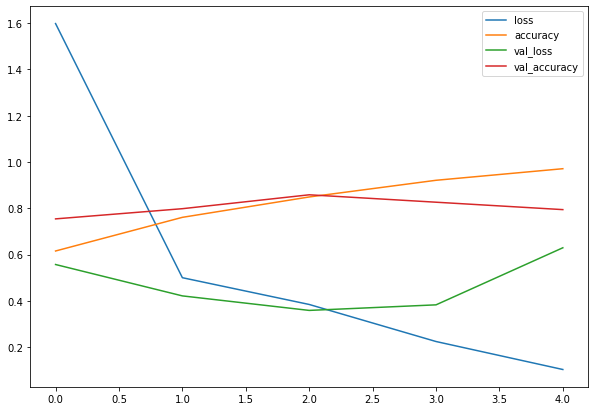

In [37]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7));

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    # plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='trainning_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();


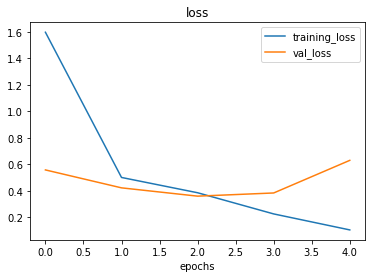

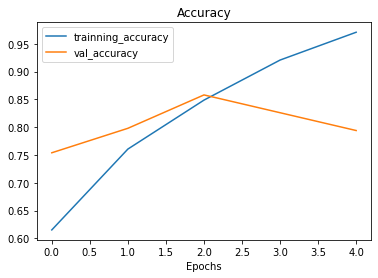

In [39]:
# Check out the loss curves of model_4
plot_loss_curves(history_4)

In [40]:
# Create the model
model_5 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_5.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model
history_5 = model_5.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 10s 214ms/step - loss: 0.6246 - accuracy: 0.6467 - val_loss: 0.4741 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 10s 215ms/step - loss: 0.4817 - accuracy: 0.7920 - val_loss: 0.4005 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 10s 221ms/step - loss: 0.4613 - accuracy: 0.7900 - val_loss: 0.4200 - val_accuracy: 0.8060
Epoch 4/5
47/47 [==============================] - 10s 208ms/step - loss: 0.4167 - accuracy: 0.8167 - val_loss: 0.3568 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 10s 210ms/step - loss: 0.4130 - accuracy: 0.8080 - val_loss: 0.3543 - val_accuracy: 0.8640


In [41]:
model_5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

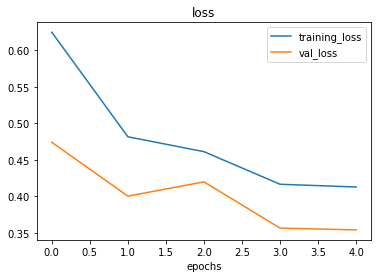

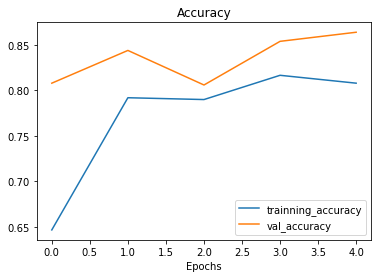

In [42]:
plot_loss_curves(history_5)

In [43]:
# Create ImageDataGenerator training instance with data augmantation
train_datagen_augmented = ImageDataGenerator(
    rescale=1/255.,
    rotation_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [44]:
# Import data and augment it from training directory
print('Augmented training data')
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

print('Non-Augmented training data:')
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

IMG_SIZE = (224, 224)
print('Non-Augmented test data:')
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary'
)

Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data:
Found 1500 images belonging to 2 classes.
Non-Augmented test data:
Found 500 images belonging to 2 classes.


In [45]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

showing image number: 20


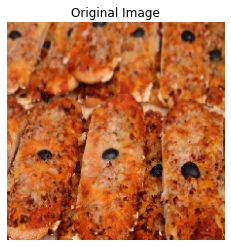

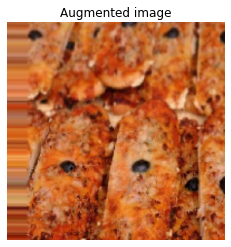

In [46]:
import random

random_number = random.randint(0, 32)
print(f'showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f"Original Image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis(False);

In [47]:
# Create a model (same as model 5)
model_6 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile
model_6.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model
history_6 = model_6.fit(
    train_data_augmented,
    epochs=5,
    steps_per_epoch=len(train_data_augmented),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 16s 331ms/step - loss: 0.7036 - accuracy: 0.4087 - val_loss: 0.6845 - val_accuracy: 0.5720
Epoch 2/5
47/47 [==============================] - 15s 320ms/step - loss: 0.6849 - accuracy: 0.6073 - val_loss: 0.6439 - val_accuracy: 0.6780
Epoch 3/5
47/47 [==============================] - 15s 321ms/step - loss: 0.7414 - accuracy: 0.6400 - val_loss: 0.6377 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 15s 324ms/step - loss: 0.6830 - accuracy: 0.5787 - val_loss: 0.6226 - val_accuracy: 0.6800
Epoch 5/5
47/47 [==============================] - 15s 322ms/step - loss: 0.6472 - accuracy: 0.6287 - val_loss: 0.5795 - val_accuracy: 0.7880


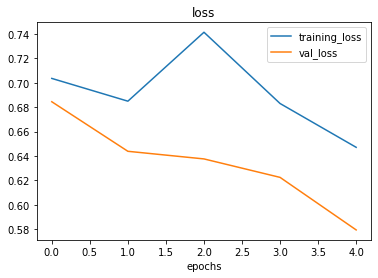

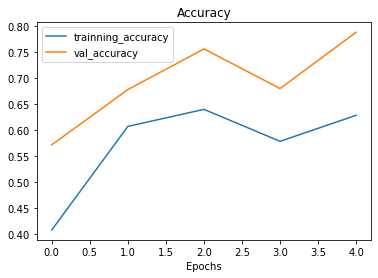

In [48]:
plot_loss_curves(history_6)

In [49]:
print('Augmented training data shuffled')
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

Augmented training data shuffled
Found 1500 images belonging to 2 classes.


In [50]:
# Create a model (same as model 5)
model_7 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

# Compile
model_7.compile(
    loss='binary_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

# Fit the model
history_7 = model_7.fit(
    train_data_augmented_shuffled,
    epochs=5,
    steps_per_epoch=len(train_data_augmented_shuffled),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5
47/47 [==============================] - 16s 326ms/step - loss: 0.6672 - accuracy: 0.5833 - val_loss: 0.6058 - val_accuracy: 0.6900
Epoch 2/5
47/47 [==============================] - 16s 329ms/step - loss: 0.5863 - accuracy: 0.6827 - val_loss: 0.5478 - val_accuracy: 0.6880
Epoch 3/5
47/47 [==============================] - 15s 326ms/step - loss: 0.5564 - accuracy: 0.7280 - val_loss: 0.5595 - val_accuracy: 0.6960
Epoch 4/5
47/47 [==============================] - 15s 317ms/step - loss: 0.5287 - accuracy: 0.7360 - val_loss: 0.3792 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 15s 319ms/step - loss: 0.4603 - accuracy: 0.7807 - val_loss: 0.3562 - val_accuracy: 0.8400


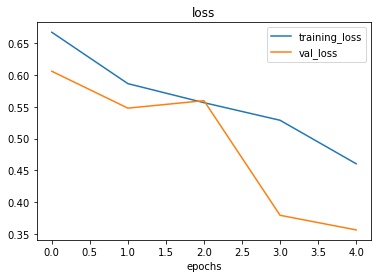

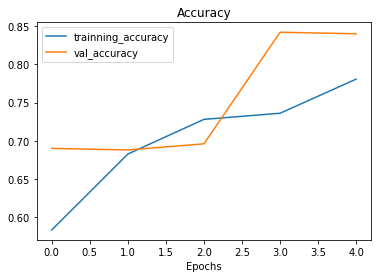

In [51]:
plot_loss_curves(history_7)

In [52]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [53]:
# Load in and preprocess our custom image
steak = load_and_prep_image("images/03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [54]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

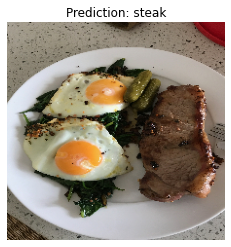

In [56]:
# Test our model on a custom image
pred_and_plot(model_7, "images/03-steak.jpeg", class_names)

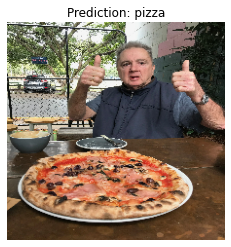

In [57]:
# Test our model on a custom image
pred_and_plot(model_7, "images/03-pizza-dad.jpeg", class_names)

In [58]:
# import zipfile

# # Download zip file of 10_food_classes images
# # See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# # Unzip the downloaded file
# zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

--2022-02-08 19:47:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
SSL_INIT
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving storage.googleapis.com (storage.googleapis.com)... 2607:f8b0:4008:813::2010, 2607:f8b0:4008:800::2010, 2607:f8b0:4008:801::2010, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|2607:f8b0:4008:813::2010|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  5.93MB/s    in 92s     

2022-02-08 19:49:30 (5.36 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [59]:
import os

# Walk through 10_food_classes directory and list number of files
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.

In [60]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [61]:
# Get the class names for our multi-class dataset
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


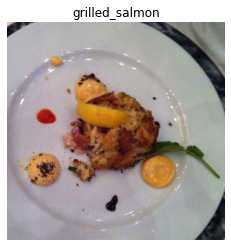

In [64]:
# View a random image from the training dataset
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names)) # get a random class name

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [66]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model_9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model_9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [67]:
# Fit the model
history_9 = model_9.fit(train_data, # now 10 different classes 
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 113s 480ms/step - loss: 2.1449 - accuracy: 0.2209 - val_loss: 2.0021 - val_accuracy: 0.2828
Epoch 2/5
235/235 [==============================] - 111s 471ms/step - loss: 1.8742 - accuracy: 0.3565 - val_loss: 1.8434 - val_accuracy: 0.3660
Epoch 3/5
235/235 [==============================] - 111s 471ms/step - loss: 1.5585 - accuracy: 0.4824 - val_loss: 1.9607 - val_accuracy: 0.3416
Epoch 4/5
235/235 [==============================] - 108s 461ms/step - loss: 0.9814 - accuracy: 0.6863 - val_loss: 2.3626 - val_accuracy: 0.3060
Epoch 5/5
235/235 [==============================] - 108s 459ms/step - loss: 0.4071 - accuracy: 0.8767 - val_loss: 3.2029 - val_accuracy: 0.2988


In [68]:
# Evaluate on the test data
model_9.evaluate(test_data)

79/79 [==============================] - 9s 109ms/step - loss: 3.2029 - accuracy: 0.2988


[3.202944755554199, 0.298799991607666]

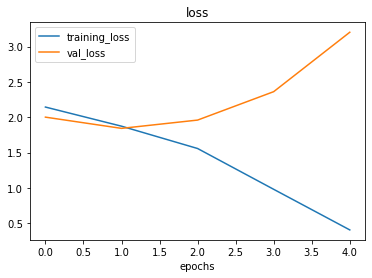

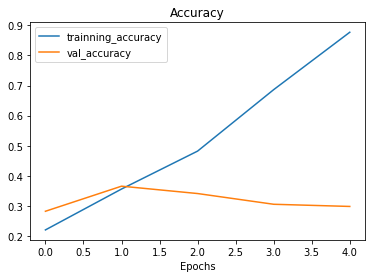

In [69]:
# Check out the model's loss curves on the 10 classes of data (note: this function comes from above in the notebook)
plot_loss_curves(history_9)

In [70]:
# Try a simplified model (removed two layers)
model_10 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax')
])

model_10.compile(loss='categorical_crossentropy',
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=['accuracy'])

history_10 = model_10.fit(train_data,
                          epochs=5,
                          steps_per_epoch=len(train_data),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 46s 194ms/step - loss: 2.3684 - accuracy: 0.2023 - val_loss: 2.0146 - val_accuracy: 0.2608
Epoch 2/5
235/235 [==============================] - 47s 199ms/step - loss: 1.7989 - accuracy: 0.3881 - val_loss: 1.9641 - val_accuracy: 0.3048
Epoch 3/5
235/235 [==============================] - 47s 199ms/step - loss: 1.4317 - accuracy: 0.5283 - val_loss: 2.0428 - val_accuracy: 0.3060
Epoch 4/5
235/235 [==============================] - 46s 197ms/step - loss: 1.0355 - accuracy: 0.6672 - val_loss: 2.2555 - val_accuracy: 0.2956
Epoch 5/5
235/235 [==============================] - 46s 198ms/step - loss: 0.6374 - accuracy: 0.8117 - val_loss: 2.5681 - val_accuracy: 0.3084


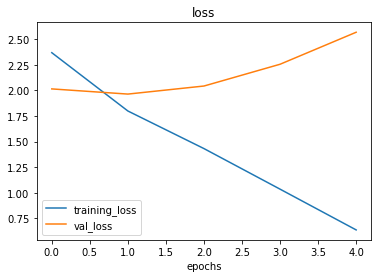

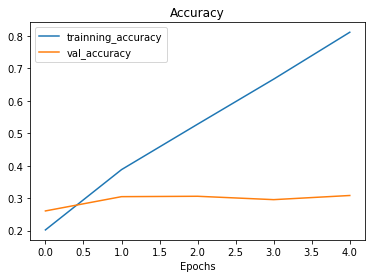

In [71]:
# Check out the loss curves of model_10
plot_loss_curves(history_10)

In [72]:
# Create augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # note: this is an int not a float
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [73]:
# Clone the model (use the same architecture)
model_11 = tf.keras.models.clone_model(model_10)

# Compile the cloned model (same setup as used for model_10)
model_11.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_11 = model_11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 77s 325ms/step - loss: 2.1890 - accuracy: 0.2080 - val_loss: 2.1280 - val_accuracy: 0.2260
Epoch 2/5
235/235 [==============================] - 74s 315ms/step - loss: 2.0538 - accuracy: 0.2809 - val_loss: 1.9307 - val_accuracy: 0.3124
Epoch 3/5
235/235 [==============================] - 75s 318ms/step - loss: 2.0010 - accuracy: 0.3069 - val_loss: 1.9180 - val_accuracy: 0.3288
Epoch 4/5
235/235 [==============================] - 75s 320ms/step - loss: 1.9572 - accuracy: 0.3229 - val_loss: 1.8255 - val_accuracy: 0.3720
Epoch 5/5
235/235 [==============================] - 75s 318ms/step - loss: 1.9435 - accuracy: 0.3279 - val_loss: 1.8632 - val_accuracy: 0.3628


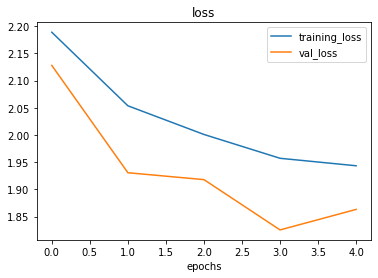

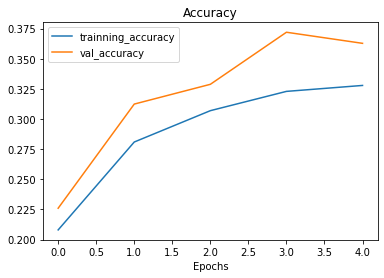

In [74]:
# Check out our model's performance with augmented data
plot_loss_curves(history_11)

In [75]:
# What classes has our model been trained on?
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

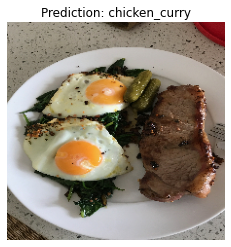

In [76]:
# Make a prediction using model_11
pred_and_plot(model=model_11, 
              filename="images/03-steak.jpeg", 
              class_names=class_names)

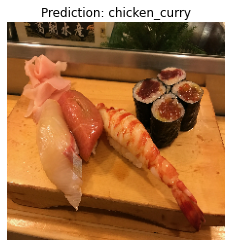

In [77]:
pred_and_plot(model_11, "images/03-sushi.jpeg", class_names)

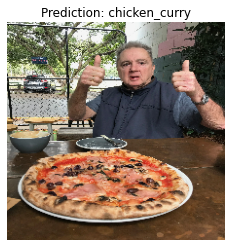

In [78]:
pred_and_plot(model_11, "images/03-pizza-dad.jpeg", class_names)

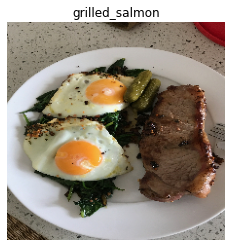

In [79]:
# Load in and preprocess our custom image
img = load_and_prep_image("images/03-steak.jpeg")

# Make a prediction
pred = model_11.predict(tf.expand_dims(img, axis=0))

# Match the prediction class to the highest prediction probability
pred_class = class_names[pred.argmax()]
plt.imshow(img)
plt.title(pred_class)
plt.axis(False);

In [80]:
# Check the output of the predict function
pred = model_11.predict(tf.expand_dims(img, axis=0))
pred

array([[0.05299017, 0.03376945, 0.07457282, 0.30183962, 0.02641804,
        0.02796766, 0.0733229 , 0.07255258, 0.2770646 , 0.05950215]],
      dtype=float32)

In [81]:
# Find the predicted class name
class_names[pred.argmax()]

'grilled_salmon'

In [82]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

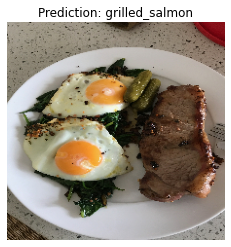

In [83]:
pred_and_plot(model_11, "images/03-steak.jpeg", class_names)

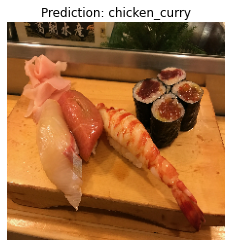

In [84]:
pred_and_plot(model_11, "images/03-sushi.jpeg", class_names)

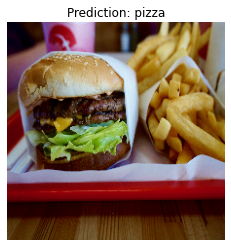

In [86]:
pred_and_plot(model_11, "images/03-hamburger.jpeg", class_names)

In [87]:
# Save a model
model_11.save("saved_trained_model")

2022-02-08 20:32:09.121682: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: saved_trained_model/assets


In [88]:
# Load in a model and evaluate it
loaded_model_11 = tf.keras.models.load_model("saved_trained_model")
loaded_model_11.evaluate(test_data)

79/79 [==============================] - 5s 66ms/step - loss: 1.8632 - accuracy: 0.3628


[1.8632112741470337, 0.3628000020980835]

In [89]:
# Compare our unsaved model's results (same as above)
model_11.evaluate(test_data)

79/79 [==============================] - 5s 68ms/step - loss: 1.8632 - accuracy: 0.3628


[1.8632112741470337, 0.3628000020980835]